In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [2]:
#1.1.1 Symmetric Networks(undirected)
G_symmetric = nx.Graph()

G_symmetric.add_edge('Steven',  'Laura')
G_symmetric.add_edge('Steven',  'Marc')
G_symmetric.add_edge('Steven',  'John')
G_symmetric.add_edge('Steven',  'Michelle')
G_symmetric.add_edge('Laura',   'Michelle')
G_symmetric.add_edge('Michelle','Marc')
G_symmetric.add_edge('George',  'John')
G_symmetric.add_edge('George',  'Steven')

In [3]:
print(nx.info(G_symmetric))

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 8
Average degree:   2.6667


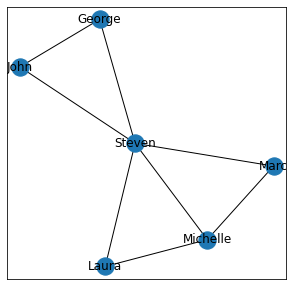

In [4]:
plt.figure(figsize=(5,5))
nx.draw_networkx(G_symmetric);

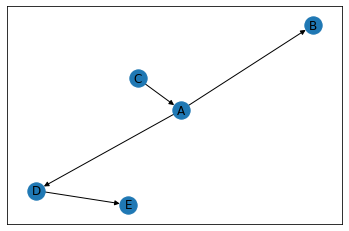

In [5]:
#1.1.2 Asymmetric Networks (directed)
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)

In [6]:
#1.1.3 Weighted Networks
G_weighted = nx.Graph()

G_weighted.add_edge('Steven',  'Laura',   weight=25)
G_weighted.add_edge('Steven',  'Marc',    weight=8)
G_weighted.add_edge('Steven',  'John',    weight=11)
G_weighted.add_edge('Steven',  'Michelle',weight=1)
G_weighted.add_edge('Laura',   'Michelle',weight=1)
G_weighted.add_edge('Michelle','Marc',    weight=1)
G_weighted.add_edge('George',  'John',    weight=8)
G_weighted.add_edge('George',  'Steven',  weight=4)

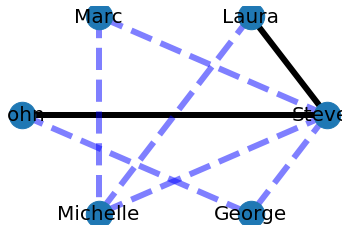

In [9]:
elarge = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] > 8]
esmall = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] <= 8]

pos = nx.circular_layout(G_weighted)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G_weighted, pos, node_size=700)

# edges
nx.draw_networkx_edges(G_weighted, pos, edgelist=elarge,width=6)
nx.draw_networkx_edges(G_weighted, pos, edgelist=esmall,width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G_weighted, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show();

In [10]:
#1.2 Clustering coefficient
nx.clustering(G_symmetric,'Michelle')

0.6666666666666666

In [11]:
nx.clustering(G_symmetric,'Laura')

1.0

In [12]:
nx.average_clustering(G_symmetric)

0.8277777777777778

In [15]:
#1.3 Network Distance Measures
#1.3.1 Degree
nx.degree(G_symmetric, 'Michelle')

3

In [16]:
#1.3.2 Distance
nx.shortest_path(G_symmetric, 'Michelle', 'John')
nx.shortest_path_length(G_symmetric, 'Michelle', 'John')

2

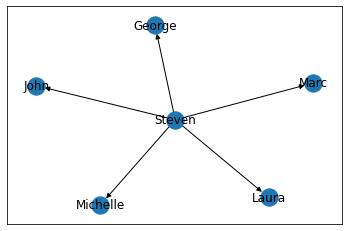

In [17]:
#1.3.3 Breadth-first search
S = nx.bfs_tree(G_symmetric, 'Steven')
nx.draw_networkx(S)

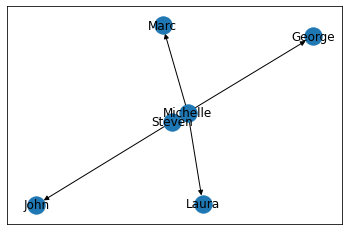

In [18]:
M = nx.bfs_tree(G_symmetric, 'Michelle')
nx.draw_networkx(M)

In [20]:
#1.3.4 Eccentricity
nx.eccentricity(G_symmetric,'Michelle')


2

In [21]:
nx.eccentricity(G_symmetric,'Steven')

1

In [23]:
#1.4 Centrality measures
nx.degree_centrality(G_symmetric)

{'Steven': 1.0,
 'Laura': 0.4,
 'Marc': 0.4,
 'John': 0.4,
 'Michelle': 0.6000000000000001,
 'George': 0.4}

In [24]:
1.4.1 Degree Centrality
nx.eigenvector_centrality(G_symmetric)

{'Steven': 0.6006686104947806,
 'Laura': 0.3545677660798074,
 'Marc': 0.3545677660798074,
 'John': 0.30844592433424667,
 'Michelle': 0.4443904166426225,
 'George': 0.30844592433424667}

In [25]:
#1.4.2 Eigenvector Centrality
nx.eigenvector_centrality(G_symmetric)

{'Steven': 0.6006686104947806,
 'Laura': 0.3545677660798074,
 'Marc': 0.3545677660798074,
 'John': 0.30844592433424667,
 'Michelle': 0.4443904166426225,
 'George': 0.30844592433424667}

In [28]:
#1.4.3 Closeness Centrality
nx.closeness_centrality(G_symmetric)

{'Steven': 1.0,
 'Laura': 0.625,
 'Marc': 0.625,
 'John': 0.625,
 'Michelle': 0.7142857142857143,
 'George': 0.625}

In [27]:
#1.4.4 Betweenness Centrality
nx.betweenness_centrality(G_symmetric)

{'Steven': 0.65,
 'Laura': 0.0,
 'Marc': 0.0,
 'John': 0.0,
 'Michelle': 0.05,
 'George': 0.0}

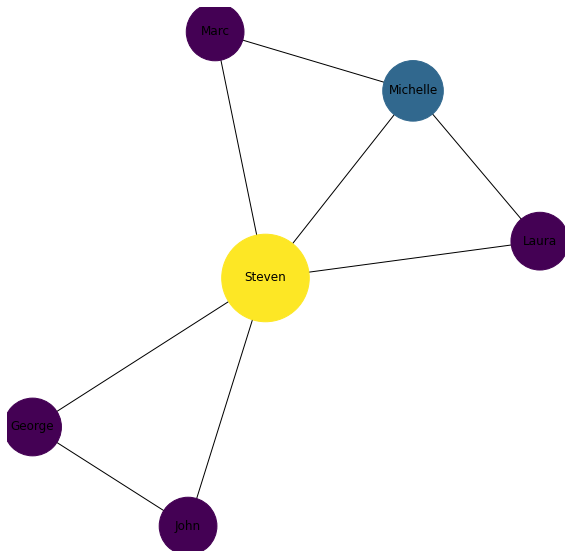

In [29]:
pos = nx.spring_layout(G_symmetric)
betCent = nx.betweenness_centrality(G_symmetric, normalized=True, endpoints=True)
node_color = [20000.0 * G_symmetric.degree(v) for v in G_symmetric]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(G_symmetric, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

In [38]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

['Steven', 'Michelle', 'Laura', 'Marc', 'John']

In [40]:
df = pd.read_csv("D:\Github\jumi/facebook_combined.txt",'r')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88233 entries, 0 to 88232
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0 1     88233 non-null  object
dtypes: object(1)
memory usage: 689.4+ KB


In [42]:
df.tail()

,0 1
88228,4026 4030
88229,4027 4031
88230,4027 4032
88231,4027 4038
88232,4031 4038


In [44]:
G_fb = nx.read_edgelist("D:\Github\jumi/facebook_combined.txt",'r', create_using = nx.Graph(), nodetype=int)

In [45]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


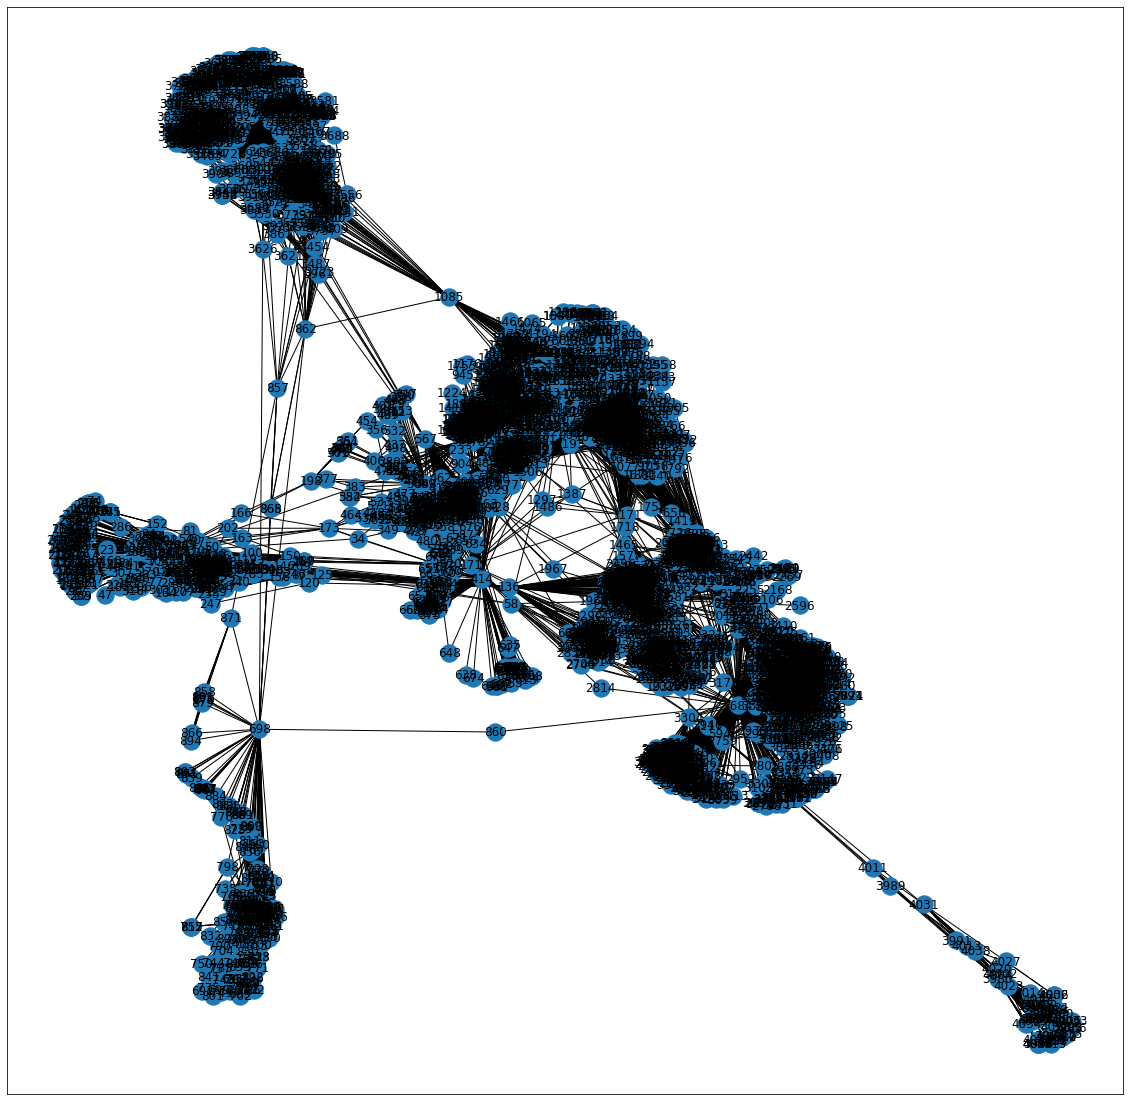

In [46]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb);

In [ ]:
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

In [ ]:
sorted(betCent, key=betCent.get, reverse=True)[:5]